<a href="https://colab.research.google.com/github/h4rshhh/Face_mask_detection_CNN/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: choose file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 62 bytes


In [ ]:
# prompt: kaggle api

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# prompt: download dataset from kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 61% 99.0M/163M [00:00<00:00, 1.03GB/s]
100% 163M/163M [00:00<00:00, 932MB/s]  


In [ ]:
# prompt: extract face-mask-dataset.zip


!unzip -q face-mask-dataset.zip

###Importing dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1783.jpg', 'with_mask_984.jpg', 'with_mask_655.jpg', 'with_mask_2549.jpg', 'with_mask_472.jpg']
['with_mask_1629.jpg', 'with_mask_3387.jpg', 'with_mask_106.jpg', 'with_mask_1383.jpg', 'with_mask_2544.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2528.jpg', 'without_mask_35.jpg', 'without_mask_2611.jpg', 'without_mask_3412.jpg', 'without_mask_868.jpg']
['without_mask_2412.jpg', 'without_mask_1296.jpg', 'without_mask_2247.jpg', 'without_mask_52.jpg', 'without_mask_2410.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


###Creating Labels

with mask --> 1

without mask --> 0

In [ ]:
#creating the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
#merging the labels into one
labels = with_mask_labels + without_mask_labels

In [ ]:
print(labels)
print(len(labels))
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

###Displaying the Images

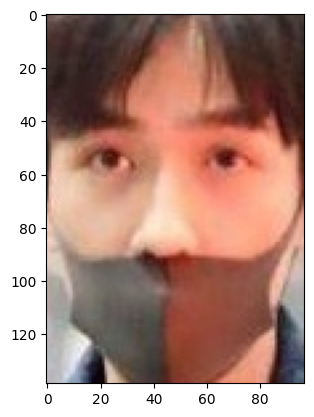

In [ ]:
img = mpimg.imread("/content/data/with_mask/with_mask_1569.jpg")
imgplot = plt.imshow(img)
plt.show()

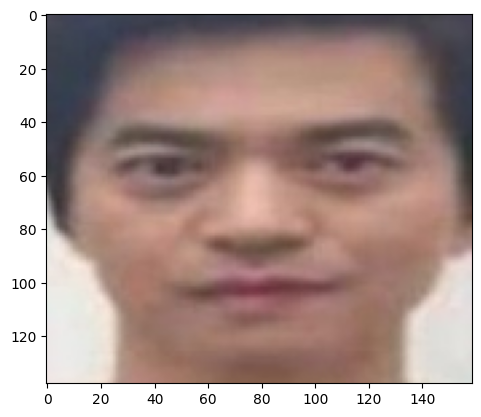

In [ ]:
img = mpimg.imread("/content/data/without_mask/without_mask_1569.jpg")
imgplot = plt.imshow(img)
plt.show()

###Image Processing

Since images vary in dimensions in this dataset, we need to perform some image processing techniques

Loops through each image filename in with_mask_files.

Opens the image, resizes it to 128x128

Converts it to RGB (ensures 3 color channels).

Converts it to a NumPy array (required format for models).

Adds it to the data list.

In [ ]:
# convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
X = np.array(data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


###Train test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [ ]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       ...,

       [[0.85098039, 0.8745098 , 0.82352941],
        [0.85098039, 0.84313725, 0.77254902],
        [0.87058824, 0

### Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential() #creating a Sequential model, which means the layers will be stacked one after another

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
print(len(X_train_scaled))
print(len(Y_train))

6042
6042


In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - acc: 0.6994 - loss: 0.7069 - val_acc: 0.8661 - val_loss: 0.2849
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - acc: 0.8806 - loss: 0.3007 - val_acc: 0.8975 - val_loss: 0.2308
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8931 - loss: 0.2602 - val_acc: 0.9041 - val_loss: 0.2105
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9034 - loss: 0.2333 - val_acc: 0.9223 - val_loss: 0.1777
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9343 - loss: 0.1781 - val_acc: 0.9190 - val_loss: 0.1841
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.9499 - loss: 0.1374 - val_acc: 0.9174 - val_loss: 0.2126
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9416 - loss: 0.1521 - val_acc: 0.9388 - val_loss: 0.2198
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9550 - loss: 0.1158 - val_acc: 0.9372 - val_loss: 0.1935
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16m

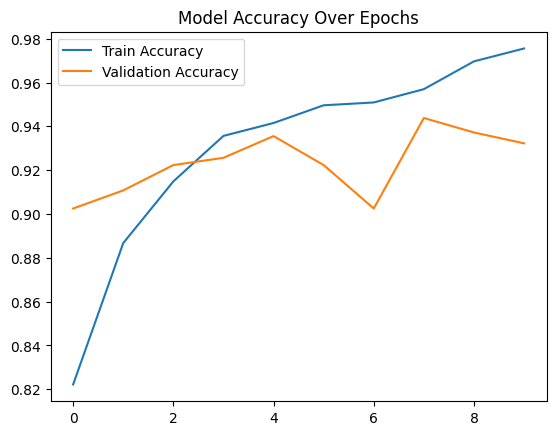

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9430 - loss: 0.2458
Test Accuracy = 0.9437458515167236


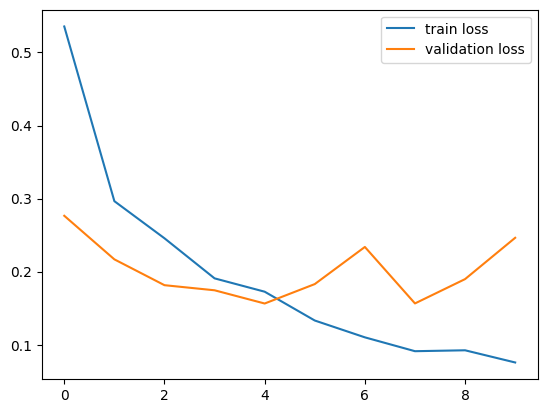

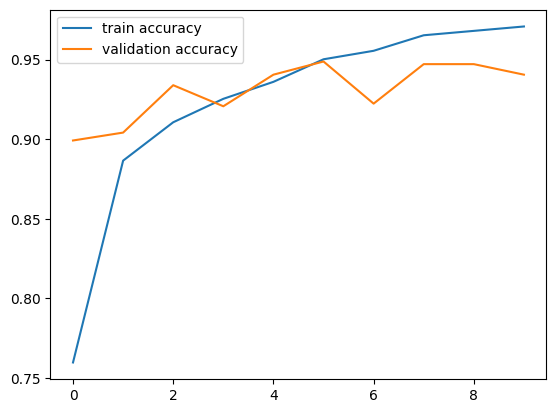

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Saving the Model


In [ ]:
model.save('model_full.keras')
